# Lecture Note 2
## Simulation of dynamic systems

In [5]:
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt


A = np.array([[-0.2,1], [0, -1]])
B = np.array([[-1],[1]])
D = np.array([0])
C = np.array([[1, 0]])

mySys = sig.StateSpace(A,B,C,D)
print(mySys)

StateSpaceContinuous(
array([[-0.2,  1. ],
       [ 0. , -1. ]]),
array([[-1],
       [ 1]]),
array([[1, 0]]),
array([[0]]),
dt: None
)


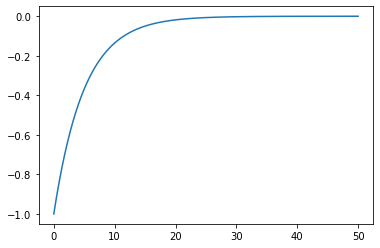

In [7]:
t = np.linspace(0,50,1000)
x0 = [-1,1]
t,y = sig.step(mySys,x0,t)

plt.plot(t,y)

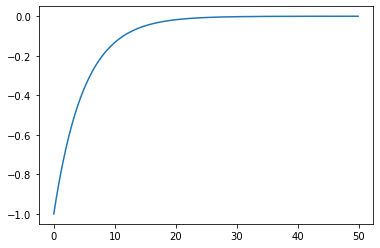

In [14]:
# now let's take a look at discretization
dt = 0.1
DTSys = mySys.to_discrete(dt, method = 'euler')
#print(DTSys)
#simulate discrete time

t, y = sig.dstep(DTSys,x0,n = 500)
plt.plot(t,np.squeeze(y))

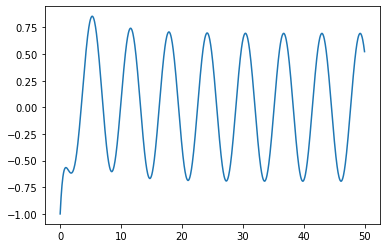

In [20]:
# let's directly use ode solver
# simulation of ode 
# all we need to specify is 
from scipy.integrate import odeint 
import math 
def myODE(x,t):
    u = np.array([math.sin(t)]) #   math.sin(t) #np.array([1])
    xdot = A@x + B@u 
    return xdot

x0  = [-1, 1] 

t = np.linspace(0,50,1000)
x = odeint(myODE, x0, t)

#print(x)
y = C@x.T
#print(y)

plt.plot(t,np.squeeze(y))


In [19]:
print(math.sin(2))

0.9092974268256817


# Lecture Note 4
## Jordan form and stability Examples

In [6]:
from sympy import Matrix,Symbol
import numpy as np

a = np.array([[5, 4, 2, 1], [0, 1, -1, -1], [-1, -1, 3, 0], [1, 1, -1, 2]])
A = Matrix(a)
P,J = A.jordan_form()
print(J)


a1 = Symbol('a1')
a2 = Symbol('a2')
k = Symbol('k')

M1 = Matrix([[a1, 1], [0,a1]])
M2 = Matrix([[a2,1,0],[0,a2,1],[0,0,a2]])


#print(M1**k)
print(M2**k)

Matrix([[1, 0, 0, 0], [0, 2, 0, 0], [0, 0, 4, 1], [0, 0, 0, 4]])
Matrix([[a2**k, a2**(k - 1)*k, a2**(k - 2)*k*(k - 1)/2], [0, a2**k, a2**(k - 1)*k], [0, 0, a2**k]])


# Lecture Note 5


## Closed-loop System Example

In [ ]:
import numpy as np
import scipy.signal as sig
import scipy.linalg as la

import matplotlib.pyplot as plt

A1 = np.mat('1,1;1 -0.21')
A2 = np.mat('-0.5 -1;0 0.3')

B1 = np.mat('1;0')
B2 =np.mat('0;1')
C1 = np.mat('0.3,0.7')
C2 = np.mat('0.5,0.2')


N = 100
times = np.arange(N)
y = np.mat(np.zeros((1,N)))

# first approach 
# construct closed-loop system
Ac = np.block([[A1, B1*C2], [B2*C1, A2]])
Cc = np.block([np.zeros((1,2)),C2])
# simulate closed-loop system
x = np.mat(np.zeros((4,N)))

#initial state
x[:,0] = np.mat('1;1;-1;-1')
for k in range(N-1):
    y[:,k] =Cc*x[:,k]
    x[:,k+1] = Ac*x[:,k]
plt.figure(1)
plt.plot(times,y[0,:].T,'r')


# second approach, simulate individual blocks
# # initialization 

x1 = np.mat(np.zeros((2,N)))
x2 = np.mat(np.zeros((2,N)))
y1 = np.mat(np.zeros((1,N)))
y2 = np.mat(np.zeros((1,N)))
u1 = np.mat(np.zeros((1,N)))
u2 = np.mat(np.zeros((1,N)))
x1[:,0] = np.mat('1;1')
x2[:,0] = np.mat('-1;-1')
#start simulation

for k in range(N-1):
    y1[:,k] = C1*x1[:,k]
    y2[:,k] = C2*x2[:,k]

    # connection
    u1[:,k] = y2[:,k]
    u2[:,k] = y1[:,k]
    
    # state update
    x1[:,k+1] = A1*x1[:,k] + B1*u1[:,k]
    x2[:,k+1] = A2*x2[:,k] + B2*u2[:,k]

plt.figure(2)
plt.plot(times,y2[0,:].T,'g')   

## Eigenvalue assignment example

In [2]:
import numpy as np
import scipy.linalg as la
A =np.mat('2   0  -2;  4  -2   2;  0     2    -2')
B =np.mat('1; 0; 1')

eig_desired = np.array([2, 4-3*1j, 4+3*1j])

# step 1: finding P
Delta_A = np.poly(A)
n = 3;

Bbar = np.mat(np.zeros((n,1)))
Bbar[-1,0] = 1

Abar = np.mat(np.zeros((n,n)))
Abar[0,1] = 1
Abar[1,2] =1
Abar[2,:] = -Delta_A[-1:0:-1]

Mc = np.block([B, A*B, A**2*B])
Mcbar = np.block([Bbar, Abar*Bbar, Abar**2*Bbar])
P = Mc*la.inv(Mcbar)

print(la.inv(P)*A*P)
print(la.inv(P)*B)

# design Kbar
DeltaA_desired = np.poly(eig_desired)
Kbar = np.mat(DeltaA_desired[-1:0:-1] - Delta_A[-1:0:-1])
print(la.eigvals(Abar-Bbar*Kbar))

# design K

K = Kbar*P**(-1)
#check the final result

print(la.eigvals(A-B*K))


[[-9.43689571e-16  1.00000000e+00  2.22044605e-16]
 [ 1.99840144e-15 -1.33226763e-16  1.00000000e+00]
 [-1.60000000e+01  8.00000000e+00 -2.00000000e+00]]
[[ 0.00000000e+00]
 [-1.38777878e-17]
 [ 1.00000000e+00]]
[2.+0.j 4.+3.j 4.-3.j]
[2.+0.j 4.+3.j 4.-3.j]


In [ ]:
print(Bbar)
print(Abar)

In [ ]:
from scipy import signal
fb = signal.place_poles(A,B,eig_desired)

#la.eig(A-B*fb.gain_matrix)

